In [63]:
import pandas as pd

# Load dataset
df = pd.read_csv("./datasets/bike_data_normalized.csv", index_col=0)

In [66]:
# Copy this to other notebooks to get the train and test data
def load_train_test():
    train_df = pd.read_csv("./datasets/bike_train.csv", index_col=0)
    test_df = pd.read_csv("./datasets/bike_test.csv", index_col=0)
    X_train = train_df.drop("Count", axis=1).values
    y_train = train_df["Count"]
    X_test = test_df.drop("Count", axis=1).values
    y_test = test_df["Count"]
    return (X_train, X_test, y_train, y_test)

## Train Test Split

In [67]:
X_train, X_test, y_train, y_test = load_train_test()

In [68]:
X_train[0]

array([0.17391304, 0.11327434, 0.51020408, 0.16216216, 0.99288256,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ])

## Linear Regression Models

### Lin Reg Basic


In [69]:
from sklearn.metrics import r2_score

# Linear Regression Model basic
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

reg = LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print("R2 score for linreg: ", r2_score(y_test, y_pred))

R2 score for linreg:  0.5310094112957024


### Lin Reg with CV to choose alpha

In [70]:
from sklearn.linear_model import RidgeCV

lr_ridge = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0, 100))
lr_ridge.fit(X_train, y_train)
y_pred = lr_ridge.predict(X_test)

print("R2 score for linreg ridge: ", r2_score(y_test, y_pred))

R2 score for linreg ridge:  0.5325606990866076


In [71]:
chosen_alpha = lr_ridge.alpha_

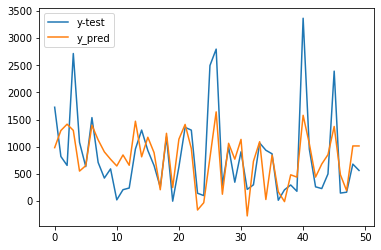

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
N = 50

plt.plot(list(y_test[:N]), label="y-test")
plt.plot(list(y_pred[:N]), label="y_pred")
plt.legend()
plt.show()

## Train on Entire Dataset

In [73]:
X = df.drop("Count", axis=1).values
y = df["Count"]

In [74]:
from sklearn.linear_model import Ridge

lr_ridge = Ridge(alpha=chosen_alpha)
lr_ridge.fit(X, y)
y_pred = lr_ridge.predict(X)

print("R2 score for linreg ridge on entire dataset: ", r2_score(y, y_pred))

R2 score for linreg ridge on entire dataset:  0.5481621179262479


In [75]:
X[0]

array([0.17391304, 0.11327434, 0.51020408, 0.16216216, 0.99288256,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ])

## Model Persistence


In [76]:
from joblib import dump, load
dump(lr_ridge, './models/linear_regression.joblib') 

['./models/linear_regression.joblib']